# N2V Training
Here we will train a plain N2V network on single noisy images.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from unet.model import UNet
import torch

from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


## Convallaria

### Load Data

In [2]:
path='ConvallariaData/Convallaria_diaphragm/'

# Load the training data
data=imread(path+'20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif')

### Create the Network and Train it
This can take a while.

In [3]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix='conv_N2V', directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=10, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

/home/hila/JacobianMMSE/code/pn2v/unet/model.py:215: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
/home/hila/JacobianMMSE/code/pn2v/unet/model.py:216: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)


Epoch 0 finished      
avg. loss: 0.14038096107542514+-(2SEM)0.03338862772817523      
Epoch 1 finished      
avg. loss: 0.16411519497632981+-(2SEM)0.046205788972473905      
Epoch 2 finished      
avg. loss: 0.16257033720612526+-(2SEM)0.051322720344456806      
Epoch 3 finished      
avg. loss: 0.12462376048788429+-(2SEM)0.0376622772501254      
Epoch 4 finished      
avg. loss: 0.1312216816470027+-(2SEM)0.03177447756311528      
Epoch 5 finished      
avg. loss: 0.1644012840464711+-(2SEM)0.03909291746032563      
Epoch 6 finished      
avg. loss: 0.10826999619603157+-(2SEM)0.025904491426065063      
Epoch 7 finished      
avg. loss: 0.11109863556921482+-(2SEM)0.024146028190256283      
Epoch 8 finished      
avg. loss: 0.10714000761508942+-(2SEM)0.022594496564696535      
Epoch 9 finished      
avg. loss: 0.10501293875277043+-(2SEM)0.023914261079722294      
Epoch 10 finished      
avg. loss: 0.15201456528156995+-(2SEM)0.04415194118268984      
Epoch 11 finished      
avg. loss: 0.09

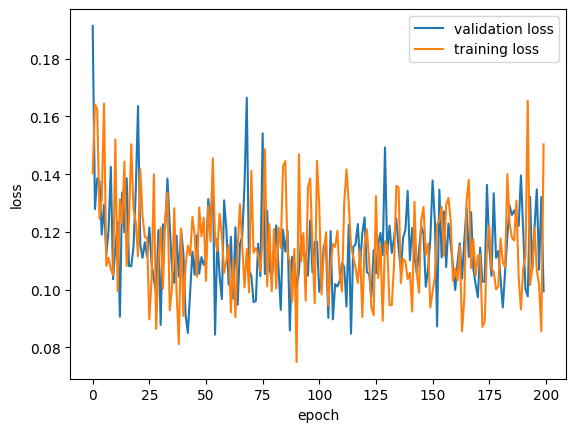

In [4]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()

In [11]:
print(f'my_train_data.std(axis=0).mean(): {my_train_data.std(axis=0).mean()}')
print(f'my_train_data.std(): {my_train_data.std()}')
print(f'my_train_data.min(): {my_train_data.min()}')
print(f'my_train_data.max(): {my_train_data.max()}')

my_train_data.std(axis=0).mean(): 116.16774270920864
my_train_data.std(): 473.0936973179963
my_train_data.min(): 234
my_train_data.max(): 7389


## Mouse

### Load Data

In [9]:
path='FMD/TwoPhoton_MICE/raw/'

# Load the training data
data=np.load(path+'training_raw.npy').astype(np.float32)

### Create the Network and Train it
This can take a while.

In [10]:
# The N2V network requires only a single output unit per pixel
seed = 0
torch.manual_seed(seed)
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix='N2V_conv_twophoton_mice'+str(seed), directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=50, 
                                           virtualBatchSize=20, batchSize=4, learningRate=1e-4)

/home/hila/JacobianMMSE/code/pn2v/unet/model.py:215: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
/home/hila/JacobianMMSE/code/pn2v/unet/model.py:216: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)


Epoch 0 finished      
avg. loss: 0.38719930648803713+-(2SEM)0.024645844635563338      
Epoch 1 finished      
avg. loss: 0.3916569337248802+-(2SEM)0.020121527555520394      
Epoch 2 finished      
avg. loss: 0.3980317279696465+-(2SEM)0.02746883175190055      
Epoch 3 finished      
avg. loss: 0.39579892009496687+-(2SEM)0.02489349631406496      
Epoch 4 finished      
avg. loss: 0.3724175587296486+-(2SEM)0.01795305967864261      
Epoch 5 finished      
avg. loss: 0.37771797776222227+-(2SEM)0.028578572168029427      
Epoch 6 finished      
avg. loss: 0.3697828322649002+-(2SEM)0.029543891764618146      
Epoch 7 finished      
avg. loss: 0.37429884672164915+-(2SEM)0.01487714226488592      
Epoch 8 finished      
avg. loss: 0.3782723993062973+-(2SEM)0.021310183616647296      
Epoch 9 finished      
avg. loss: 0.3879972040653229+-(2SEM)0.02745710365505503      
Epoch 10 finished      
avg. loss: 0.36649871468544004+-(2SEM)0.023346321910534932      
Epoch 11 finished      
avg. loss: 0.37811

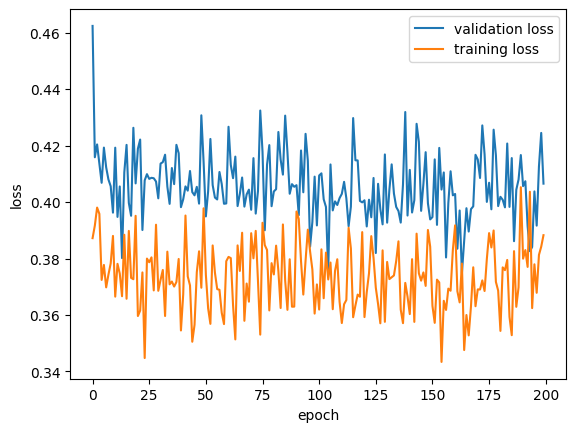

In [11]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()

In [6]:
print(f'my_train_data.std(axis=0).mean(): {my_train_data.std(axis=0).mean()}')
print(f'my_train_data.std(): {my_train_data.std()}')
print(f'my_train_data.min(): {my_train_data.min()}')
print(f'my_train_data.max(): {my_train_data.max()}')


my_train_data.std(axis=0).mean(): 18.736783981323242
my_train_data.std(): 23.363447189331055
my_train_data.min(): 1.0
my_train_data.max(): 255.0
